<a href="https://colab.research.google.com/github/Es-YES-Ye/Python/blob/main/d18_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run my_init.py

Mounted at /content/drive
tf.__version__: 2.8.0
keras.__version__: 2.8.0


In [ ]:
%matplotlib inline

In [ ]:
from keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

In [ ]:
train_input.shape, test_input.shape

((25000,), (25000,))

In [ ]:
len(train_input[0])

218

In [ ]:
len(train_input[1])

189

In [ ]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
train_target[:20]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [ ]:
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
train_input.shape

(20000,)

In [ ]:
lengths = [len(x) for x in train_input]
lengths[:10]

[259, 520, 290, 109, 559, 96, 130, 935, 383, 716]

In [ ]:
np.mean(lengths), np.median(lengths)

(239.00925, 178.0)

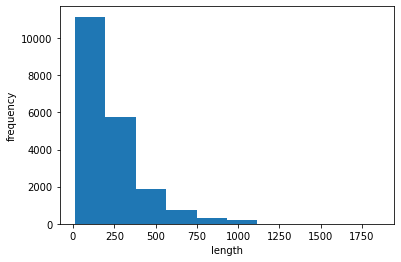

In [ ]:
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()  

In [ ]:
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

In [ ]:
train_seq.shape

(20000, 100)

In [ ]:
train_seq[0]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158], dtype=int32)

In [ ]:
train_seq[5]

array([  0,   0,   0,   0,   1,   2, 195,  19,  49,   2,   2, 190,   4,
         2, 352,   2, 183,  10,  10,  13,  82,  79,   4,   2,  36,  71,
       269,   8,   2,  25,  19,  49,   7,   4,   2,   2,   2,   2,   2,
        10,  10,  48,  25,  40,   2,  11,   2,   2,  40,   2,   2,   5,
         4,   2,   2,  95,  14, 238,  56, 129,   2,  10,  10,  21,   2,
        94, 364, 352,   2,   2,  11, 190,  24, 484,   2,   7,  94, 205,
       405,  10,  10,  87,   2,  34,  49,   2,   7,   2,   2,   2,   2,
         2, 290,   2,  46,  48,  64,  18,   4,   2], dtype=int32)

In [ ]:
val_seq = pad_sequences(val_input, maxlen=100)
val_seq.shape

(5000, 100)

In [ ]:
train_oh = keras.utils.to_categorical(train_seq)
train_oh.shape

(20000, 100, 500)

In [ ]:
train_oh[0, 0, :12]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [ ]:
train_oh[0, 1, :12]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
train_oh[0, 99, :12]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
val_oh = keras.utils.to_categorical(val_seq)
val_oh.shape

(5000, 100, 500)

In [ ]:
#model = keras.Sequential()

#model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
#model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
#model.summary()

In [ ]:
#rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

In [ ]:
#model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
#              metrics=['accuracy'])

In [ ]:
#checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
#early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
#                                                  restore_best_weights=True)

In [ ]:
#history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
#                    validation_data=(val_oh, val_target),
#                    callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.xlabel('epoch')
#plt.ylabel('loss')
#plt.legend(['train', 'val'])
#plt.show()

In [ ]:
model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, dropout=0.3, return_sequences=True, input_shape=(100, 500), name="rnn_1"))
model.add(keras.layers.SimpleRNN(8, dropout=0.3, name='rnn_2'))
model.add(keras.layers.Dense(1, activation='sigmoid', name='output'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnn_1 (SimpleRNN)           (None, 100, 8)            4072      
                                                                 
 rnn_2 (SimpleRNN)           (None, 8)                 136       
                                                                 
 output (Dense)              (None, 1)                 9         
                                                                 
Total params: 4,217
Trainable params: 4,217
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

In [ ]:
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn2-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

In [ ]:
history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 33s 97ms/step - loss: 0.7146 - accuracy: 0.5023 - val_loss: 0.7052 - val_accuracy: 0.4956
Epoch 2/100
313/313 [==============================] - 28s 90ms/step - loss: 0.7074 - accuracy: 0.5012 - val_loss: 0.6991 - val_accuracy: 0.4962
Epoch 3/100
313/313 [==============================] - 28s 90ms/step - loss: 0.7017 - accuracy: 0.5030 - val_loss: 0.6960 - val_accuracy: 0.4964
Epoch 4/100
313/313 [==============================] - 28s 90ms/step - loss: 0.6978 - accuracy: 0.5092 - val_loss: 0.6944 - val_accuracy: 0.4970
Epoch 5/100
203/313 [==================>...........] - ETA: 9s - loss: 0.6951 - accuracy: 0.5135

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()